# Семинар 5. Фреймворк `PyTorch` и полносвязные сети

**Внимание!** Для работы над задачами этого семинара на локальном устройстве потребуется установить [`PyTorch`](https://pytorch.org/get-started/locally/).
При работе в Google Colab ничего устанавливать не нужно, модуль уже доступен и его можно сразу импортировать.

После установки `PyTorch` убедитесь, что следующий код запускается и выводит на экран набор нормально распределенных вещественных чисел размером 5×3:

```python
import torch
x = torch.rand(5, 3)
print(x)
```

In [41]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7610, 0.8076, 0.1234],
        [0.1790, 0.1060, 0.0740],
        [0.3570, 0.9444, 0.1131],
        [0.7471, 0.2564, 0.0844],
        [0.3441, 0.3616, 0.9545]])


## Предисловие

Если вы никогда прежде не работали или просто неуверенно себя чуствуете в `PyTorch`, вам могут оказаться полезны обучающие [материалы и примеры](https://docs.pytorch.org/tutorials/) из официальной документации.

В частности, перед выполнением задач к этому семинару рекомендуется пролистать и освоить [это введение](https://docs.pytorch.org/tutorials/beginner/basics/intro.html) в основы фреймворка. В нём всего 8 содержательных разделов, и на изучение каждого уйдёт по 10-20 минут, но взамен вы получите обзорную информацию по всем основным возможностям фреймворка.

Также есть небольшой [плейлист](https://www.youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN) из обучающих видеороликов. Суммарная продолжительность составляет около 2.5 часов, если пренебречь некоторыми любопытными [особенностями](https://transparencyreport.google.com/traffic/overview?fraction_traffic=end:1762991999999;product:21;region:RU;start:1699747200000&lu=fraction_traffic) доступа к YouTube из России.

## Задача 5.1. Forward/backward pass [max = 10 баллов]

Одна из ключевых полезных возможностей `PyTorch` — автоматическое дифференцирование.

Когда вы вычисляете некоторую суперпозицию элементарных функций $f_k\circ\dots \circ f_2 \circ f_1$ над объектом $x$, можно «запомиинать» вычислительный граф (отдельно взятые функции $f_i,\;i\in\{1,\,2,\,\dots,\,k\}$ и последовательность их применения), благодаря чему можно легко (аналитически!) восстановить производную по $x$ – этим мы уже занимались в прежних семинарах, работая с `NumPy`.

Для `PyTorch` всё это уже автоматически реализовано внутри библиотеки – остаётся только освоить и пользоваться!

### Шаблоны к задаче

#### `python`

```python
class PurePythonForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = # инициализируйте list (вещественных) единиц
        self.b = # инициализируйте float единицей

    def forward(
            self,
            X:list[list[float]]
        )->list[float]:
        """
        Parameters
        ----------
        X : list[list[float]]
            список длины n_samples из списков вещественных чисел длины n_features – набор признаков

        Returns
        -------
        out : list[float]
            список длины n_samples из вещественных чисел – набор выходных значений модели
        """

        out = # вычислите выходное значение модели по известным X, self.w, self.b

        return out

    def forward_and_backward(
            self,
            X:list[list[float]],
            y:list[float]
        )->tuple[float, list[float], float]:
        """
        Parameters
        ----------
        X : list[list[float]]
            список длины n_samples из списков вещественных чисел длины n_features – набор признаков

        y : list[float]
            список длины n_samples из вещественных чисел – набор меток

        Returns
        -------
        mse : float, grad_w : list[float], grad_b : float
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)

        mse = # вычислите MSE Loss по известным спискам y, out
        grad_w = # вычислите градиент по весам w
        grad_b = # вычислите производную по смещению b

        return mse, grad_w, grad_b
```

#### `numpy`

```python
import numpy as np

class NumPyForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = # инициализируйте numpy.ndarray (вещественных) единиц
        self.b = # инициализируйте float единицей

    def forward(
            self,
            X:np.ndarray
        )->np.ndarray:
        """
        Parameters
        ----------
        X : numpy.ndarray[float]
            двумерный массив формы (n_samples, n_features) из вещественных чисел – набор признаков

        Returns
        -------
        out : numpy.ndarray[float]
            одномерный массив формы (n_samples,) из вещественных чисел – набор выходных значений модели
        """

        out = # вычислите выходное значение модели по известным X, self.w, self.b

        return out

    def forward_and_backward(
            self,
            X:np.ndarray,
            y:np.ndarray
        )->tuple[float, np.ndarray, float]:
        """
        Parameters
        ----------
        X : numpy.ndarray[float]
            двумерный массив формы (n_samples, n_features) из вещественных чисел – набор признаков

        y : numpy.ndarray[float]
            одномерный массив формы (n_samples,) из вещественных чисел – набор меток

        Returns
        -------
        mse : float, grad_w : numpy.ndarray[float], grad_b : float
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)

        mse = # вычислите MSE Loss по известным массивам y, out
        grad_w = # вычислите градиент по весам w
        grad_b = # вычислите производную по смещению b

        return mse, grad_w, grad_b
```

#### `torch`

```python
import torch
from torch.nn.functional import mse_loss

class PyTorchForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = # инициализируйте одномерный torch.Tensor единиц с типом данных torch.float32 и параметром requires_grad=True
        self.b = # инициализируйте нульмерный torch.Tensor из одной вещественной единицы с типом данных torch.float32 и параметром requires_grad=True

    def forward(
            self,
            X:torch.Tensor,
        )->torch.Tensor:
        """
        Parameters
        ----------
        X : torch.Tensor[torch.float32]
            двумерный тензор размера [n_samples, n_features] из вещественных чисел – набор признаков

        Returns
        -------
        out : torch.Tensor[torch.float32]
            одномерный тензор размера [n_samples,] из вещественных чисел – набор выходных значений модели
        """

        out = # вычислите выходное значение модели по известным X, self.w, self.b

        return out

    def forward_and_backward(
            self,
            X:torch.Tensor,
            y:torch.Tensor,
        )->tuple[float, torch.Tensor, torch.Tensor]:
        """
        Parameters
        ----------
        X : torch.Tensor[torch.float32]
            двумерный тензор размера [n_samples, n_features] из вещественных чисел – набор признаков

        y : torch.Tensor[torch.float32]
            одномерный тензор размера [n_samples,] из вещественныхз чисел – набор меток

        Returns
        -------
        mse : float, grad_w : torch.Tensor[torch.float32], grad_b : torch.Tensor[torch.float32]
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)

        mse = # вычислите MSE Loss по известным массивам y, out
        # !!! используйте библиотечную реализацию из torch.nn.functional

        # запускаем встроенный в PyTorch метод обратного прохода
        # вместо использования явных аналитических формул
        mse.backward()

        grad_w = self.w.grad.clone() # авто-градиент по весам w
        grad_b = self.b.grad.clone() # авто-производная по смещению b

        # обнуление градиентов - необходимый дополнительный шаг
        # иначе многократные вызовы автодифференцирования
        # будут выдавать некорректные ответы
        self.w.grad.zero_()
        self.b.grad.zero_()

        return mse.item(), grad_w, grad_b
```

### 5.1.1 Разные реализации forward и backward pass [max = 5 баллов]

Дополните шаблоны, приведённые выше: реализуйте forward / backward pass для линейной модели с одним выходным значением и со среднеквадратичной функцией потерь, используя

- [2 балла] чистый `python` с циклами, используя известные вам аналитические выражения для производных;
- [2 балла] `numpy` с векторизованными операциями, также используя аналитические выражения;
- [ 1 балл ] `torch` с помощью автоматического дифференцирования и библиотечной реализации `mse_loss`

Для будущего сравнения в каждом классе инициализируйте все параметры модели единицами. Избегайте любых проверок на некорректные данные и любых других операций, не относящихся непосредственно к forward / backward pass – далее в задании мы будем сравнивать производительность трех реализаций.

In [ ]:
import numpy as np
import torch
from torch.nn.functional import mse_loss

class PurePythonForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = [1.0]  * n_features # инициализируйте list (вещественных) единиц
        self.b = 1.0 # инициализируйте float единицей

    def forward(
            self,
            X:list[list[float]]
        )->list[float]:
        """
        Parameters
        ----------
        X : list[list[float]]
            список длины n_samples из списков вещественных чисел длины n_features – набор признаков

        Returns
        -------
        out : list[float]
            список длины n_samples из вещественных чисел – набор выходных значений модели
        """

        out = []
        for x_sample in X:
            y_pred = (
                sum(w_j * x_j for w_j, x_j in zip(self.w, x_sample)) + self.b
            )
            out.append(y_pred)

        return out

    def forward_and_backward(
            self,
            X:list[list[float]],
            y:list[float]
        )->tuple[float, list[float], float]:
        """
        Parameters
        ----------
        X : list[list[float]]
            список длины n_samples из списков вещественных чисел длины n_features – набор признаков

        y : list[float]
            список длины n_samples из вещественных чисел – набор меток

        Returns
        -------
        mse : float, grad_w : list[float], grad_b : float
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)
        n_samples = len(y)

        mse = sum((y_pred - y_true) ** 2 for y_pred, y_true in zip(out, y)) / n_samples

        grad_w = []
        for j in range(self.n_features):
            grad_w_j = sum(
                (y_pred - y_true) * x_sample[j]
                for y_pred, y_true, x_sample in zip(out, y, X)
            ) * 2 / n_samples
            grad_w.append(grad_w_j)

        grad_b = sum(y_pred - y_true for y_pred, y_true in zip(out, y)) * 2 / n_samples

        return mse, grad_w, grad_b
    


class NumPyForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = np.ones(n_features, dtype=float)
        self.b = 1.0

    def forward(
            self,
            X:np.ndarray
        )->np.ndarray:
        """
        Parameters
        ----------
        X : numpy.ndarray[float]
            двумерный массив формы (n_samples, n_features) из вещественных чисел – набор признаков

        Returns
        -------
        out : numpy.ndarray[float]
            одномерный массив формы (n_samples,) из вещественных чисел – набор выходных значений модели
        """

        out = X @ self.w + self.b  # вычислите выходное значение модели по известным X, self.w, self.b

        return out

    def forward_and_backward(
            self,
            X:np.ndarray,
            y:np.ndarray
        )->tuple[float, np.ndarray, float]:
        """
        Parameters
        ----------
        X : numpy.ndarray[float]
            двумерный массив формы (n_samples, n_features) из вещественных чисел – набор признаков

        y : numpy.ndarray[float]
            одномерный массив формы (n_samples,) из вещественных чисел – набор меток

        Returns
        -------
        mse : float, grad_w : numpy.ndarray[float], grad_b : float
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)

        n_samples = X.shape[0]
        error = out - y

        mse = np.mean(error ** 2)
        grad_w = (2.0 / n_samples) * (X.T @ error)
        grad_b = (2.0 / n_samples) * np.sum(error)

        return mse, grad_w, grad_b

class PyTorchForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = torch.ones(n_features, dtype=torch.float32, requires_grad=True)
        self.b = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

    def forward(
            self,
            X:torch.Tensor,
        )->torch.Tensor:
        """
        Parameters
        ----------
        X : torch.Tensor[torch.float32]
            двумерный тензор размера [n_samples, n_features] из вещественных чисел – набор признаков

        Returns
        -------
        out : torch.Tensor[torch.float32]
            одномерный тензор размера [n_samples,] из вещественных чисел – набор выходных значений модели
        """

        out = X @ self.w + self.b # вычислите выходное значение модели по известным X, self.w, self.b

        return out

    def forward_and_backward(
            self,
            X:torch.Tensor,
            y:torch.Tensor,
        )->tuple[float, torch.Tensor, torch.Tensor]:
        """
        Parameters
        ----------
        X : torch.Tensor[torch.float32]
            двумерный тензор размера [n_samples, n_features] из вещественных чисел – набор признаков

        y : torch.Tensor[torch.float32]
            одномерный тензор размера [n_samples,] из вещественныхз чисел – набор меток

        Returns
        -------
        mse : float, grad_w : torch.Tensor[torch.float32], grad_b : torch.Tensor[torch.float32]
            кортеж из начения MSE Loss и его градиентов по параметрам модели
        """

        out = self.forward(X)

        mse = mse_loss(out, y) # вычислите MSE Loss по известным массивам y, out
        # !!! используйте библиотечную реализацию из torch.nn.functional

        # запускаем встроенный в PyTorch метод обратного прохода
        # вместо использования явных аналитических формул
        mse.backward()

        grad_w = self.w.grad.clone() # авто-градиент по весам w
        grad_b = self.b.grad.clone() # авто-производная по смещению b

        # обнуление градиентов - необходимый дополнительный шаг
        # иначе многократные вызовы автодифференцирования
        # будут выдавать некорректные ответы
        self.w.grad.zero_()
        self.b.grad.zero_()

        return mse.item(), grad_w, grad_b

### 5.1.2 Соревнование реализаций [max = 5 баллов]

**Внимание!** Данный пункт задачи оценивается только при условии правильного выполнения пункта 5.1.1

Сравните времена выполнения методов `forward` и `forward_and_backward` для реализованных вами классов с помощью модуля `time`. Для этого:

- [ 1 балл ] напишите функцию для генерации случайных нормально распределенных датасетов из 1000 объектов и 100 признаков (численные значения в датасетах для каждой из трёх моделей должны быть одинаковы, но типы данных должны отличаться в соответствии с ранее написанным кодом)

- [2 балла] напишите функцию, которая будет измерять по отдельности время выполнения методов `forward` и `forward_and_backward` для реализованных вами классов на заранее подготовленных данных (то есть всего при одном запуске функции необходимо вычислить шесть чисел)

- [ 1 балл ] при помощи написанных вами функций проделайте 1000 симуляций и усредните полученные вами номера выполнения, сравните полученные значения и сделайте выводы

- [ 1 балл ] визуализируйте сравнение – можно использовать столбчатую диаграмму для средних времён или изобразить гистограммы получившегося статистического распределения времён

In [43]:
def generate_datasets(n_samples=1000, n_features=100, seed=42):
    """
    Генерирует одинаковые данные в трех форматах для трех реализаций.
    """
    np.random.seed(seed)

    X_numpy = np.random.randn(n_samples, n_features).astype(np.float64)
    y_numpy = np.random.randn(n_samples).astype(np.float64)

    X_list = X_numpy.tolist()
    y_list = y_numpy.tolist()

    X_torch = torch.from_numpy(X_numpy.astype(np.float32))
    y_torch = torch.from_numpy(y_numpy.astype(np.float32))

    return {
        'python': (X_list, y_list),
        'numpy': (X_numpy, y_numpy),
        'pytorch': (X_torch, y_torch)
    }

In [44]:
import time

def measure_execution_times(datasets, n_features=100):
    """
    Измеряет время выполнения методов forward и forward_and_backward
    для всех трех реализаций (возвращает 6 чисел).
    """
    times = {}

    model_python = PurePythonForwardBackwardPass(n_features)
    X_py, y_py = datasets.get('python')

    start = time.perf_counter()
    _ = model_python.forward(X_py)
    times['python_forward'] = time.perf_counter() - start

    start = time.perf_counter()
    _ = model_python.forward_and_backward(X_py, y_py)
    times['python_forward_backward'] = time.perf_counter() - start

    model_numpy = NumPyForwardBackwardPass(n_features)
    X_np, y_np = datasets.get('numpy')

    start = time.perf_counter()
    _ = model_numpy.forward(X_np)
    times['numpy_forward'] = time.perf_counter() - start

    start = time.perf_counter()
    _ = model_numpy.forward_and_backward(X_np, y_np)
    times['numpy_forward_backward'] = time.perf_counter() - start

    model_pytorch = PyTorchForwardBackwardPass(n_features)
    X_pt, y_pt = datasets.get('pytorch')

    start = time.perf_counter()
    _ = model_pytorch.forward(X_pt)
    times['pytorch_forward'] = time.perf_counter() - start

    start = time.perf_counter()
    _ = model_pytorch.forward_and_backward(X_pt, y_pt)
    times['pytorch_forward_backward'] = time.perf_counter() - start

    return times

def run_simulations(n_simulations=1000, n_samples=1000, n_features=100):

    all_times = {
        'python_forward': [],
        'python_forward_backward': [],
        'numpy_forward': [],
        'numpy_forward_backward': [],
        'pytorch_forward': [],
        'pytorch_forward_backward': []
    }

    for i in range(n_simulations):
        datasets = generate_datasets(n_samples, n_features, seed=i)
        times = measure_execution_times(datasets, n_features)

        for key in all_times.keys():
            all_times[key].append(times[key])

    avg_times = {key: np.mean(values) for key, values in all_times.items()}

    return all_times, avg_times

all_times, avg_times = run_simulations(n_simulations=1000)

In [45]:
for method_name in all_times.keys():
    times_ms = np.array(all_times[method_name]) * 1000
    print(f'{method_name}:')
    print(f'  Среднее: {np.mean(times_ms):.4f} мс')
    print(f'  Std: {np.std(times_ms):.4f} мс\n')

python_forward:
  Среднее: 9.2911 мс
  Std: 1.7371 мс

python_forward_backward:
  Среднее: 23.4697 мс
  Std: 3.3168 мс

numpy_forward:
  Среднее: 0.1370 мс
  Std: 0.3568 мс

numpy_forward_backward:
  Среднее: 0.1798 мс
  Std: 0.3937 мс

pytorch_forward:
  Среднее: 0.2036 мс
  Std: 3.5266 мс

pytorch_forward_backward:
  Среднее: 0.4051 мс
  Std: 0.7391 мс



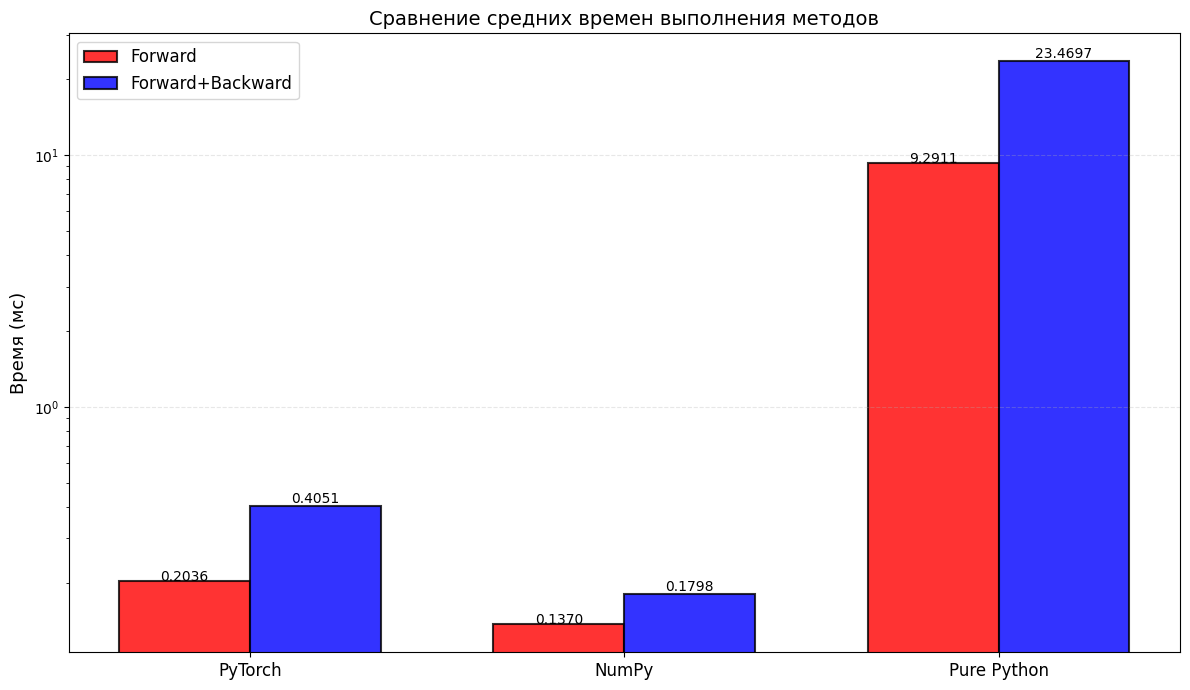

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))

implementations = ['PyTorch', 'NumPy', 'Pure Python']
forward_means = [
    avg_times['pytorch_forward'] * 1000,
    avg_times['numpy_forward'] * 1000,
    avg_times['python_forward'] * 1000
]
backward_means = [
    avg_times['pytorch_forward_backward'] * 1000,
    avg_times['numpy_forward_backward'] * 1000,
    avg_times['python_forward_backward'] * 1000
]

x = np.arange(len(implementations))
width = 0.35

bars1 = plt.bar(
    x - width/2, forward_means, width, label='Forward',
    color='r', alpha=0.8, edgecolor='black',
    linewidth=1.5
)
bars2 = plt.bar(
    x + width/2, backward_means, width, label='Forward+Backward',
    color='b', alpha=0.8, edgecolor='black',
    linewidth=1.5
)

plt.ylabel('Время (мс)', fontsize=13)
plt.title(
    'Сравнение средних времен выполнения методов',
    fontsize=14
)
plt.xticks(x, implementations, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.4f}',
        ha='center',
        fontsize=10,
    )
for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.4f}',
        ha='center',
        va='bottom',
        fontsize=10,
    )

plt.yscale('log')
plt.tight_layout()
plt.show()

## Задача 5.2* [max = 10 дополнительных баллов]

**Внимание!** Данная задача оценивается только при условии правильного выполнения пункта 5.1.1 задачи 5.1

[Halstead complexity measures](https://en.wikipedia.org/wiki/Halstead_complexity_measures) – это набор количественных метрик, используемых для условной оценки «сложности» кода.

Изучите описание этих метрик, и затем вычислите их для каждой из трех реализаций forward/backward pass из задачи 5.1,

- ЛИБО [ 7 баллов ]: с помощью не менее чем трех разных LLM (в этом случае подавайте в каждую LLM одинаковый промпт + ваш код, дополнительно приведите в качестве результатов: промпт, список использованных моделей);
- ЛИБО [ 9 баллов ]: самостоятельно вручную на бумажном листке ;
- ЛИБО [10 баллов]: при помощи собственной функции на `python`.

Вне зависимости от выбарнного способа оформите итоговые результаты в виде таблицы (по строкам – метрики, по столбцам – 3 реализации; в случае LLM – по столбцам 3 реализации × число использованных LLM).

Оценивается ТОЛЬКО ОДНО решение одним способом, вне зависимости от числа предъявленных.


In [47]:
import io
import math
import tokenize


HALSTEAD_OPERATORS = {
    'if', 'else', 'elif', 'for', 'while', 'return', 'break', 'continue',
    'class', 'def', 'in', 'not', 'and', 'or', 'is',
    'import', 'from', 'as', 'with', 'lambda',
    'try', 'except', 'finally', 'raise', 'assert', 'yield',

    '=', '+', '-', '*', '/', '//', '%', '**',
    '==', '!=', '<', '<=', '>', '>=',
    '+=', '-=', '*=', '/=', '%=',
    '(', ')', '[', ']', '{', '}',
    ',', ':', '.', '@',
}


def halstead_metrics_from_code(code: str) -> dict:
    operators_set = set()
    operands_set = set()

    N1 = 0
    N2 = 0

    tokens = tokenize.generate_tokens(io.StringIO(code).readline)

    for tok in tokens:
        tok_type = tok.type
        tok_str = tok.string

        if tok_type in {
            tokenize.NL,
            tokenize.NEWLINE,
            tokenize.INDENT,
            tokenize.DEDENT,
            tokenize.ENDMARKER,
            tokenize.COMMENT,
        }:
            continue

        if tok_type == tokenize.OP:
            op = tok_str
            operators_set.add(op)
            N1 += 1

        elif tok_type == tokenize.NAME:
            if tok_str in HALSTEAD_OPERATORS:
                operators_set.add(tok_str)
                N1 += 1
            else:
                operands_set.add(tok_str)
                N2 += 1

        elif tok_type in (tokenize.NUMBER, tokenize.STRING):
            operands_set.add(tok_str)
            N2 += 1

        else:
            operators_set.add(tok_str)
            N1 += 1

    eta1 = len(operators_set)
    eta2 = len(operands_set)
    eta = eta1 + eta2
    N = N1 + N2

    def safe_log2(x: float) -> float:
        return math.log2(x) if x > 0 else 0.0

    N_hat = eta1 * safe_log2(eta1) + eta2 * safe_log2(eta2)
    V = N * safe_log2(eta)

    D = 0.0
    if eta2 > 0:
        D = (eta1 / 2.0) * (N2 / eta2)

    E = D * V
    T = E / 18.0

    B = 0.0
    if E > 0:
        B = (E ** (2.0 / 3.0)) / 3000.0

    return {
        'eta1 (уникальные операторы)': eta1,
        'eta2 (уникальные операнды)': eta2,
        'N1 (всего операторов)': N1,
        'N2 (всего операндов)': N2,
        'eta (словарь)': eta,
        'N (длина)': N,
        'N_hat (расчетная длина)': N_hat,
        'V (объем)': V,
        'D (сложность)': D,
        'E (усилия)': E,
        'T (время)': T,
        'B (ошибки)': B,
    }



In [48]:
code_pure = '''
class PurePythonForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = [1.0]  * n_features # инициализируйте list (вещественных) единиц
        self.b = 1.0 # инициализируйте float единицей


    def forward(
            self,
            X:list[list[float]]
        )->list[float]:
        out = []
        for x_sample in X:
            y_pred = (
                sum(w_j * x_j for w_j, x_j in zip(self.w, x_sample)) + self.b
            )
            out.append(y_pred)

        return out


    def forward_and_backward(
            self,
            X:list[list[float]],
            y:list[float]
        )->tuple[float, list[float], float]:
        out = self.forward(X)
        n_samples = len(y)

        mse = sum((y_pred - y_true) ** 2 for y_pred, y_true in zip(out, y)) / n_samples

        grad_w = []
        for j in range(self.n_features):
            grad_w_j = sum(
                (y_pred - y_true) * x_sample[j]
                for y_pred, y_true, x_sample in zip(out, y, X)
            ) * 2 / n_samples
            grad_w.append(grad_w_j)

        grad_b = sum(y_pred - y_true for y_pred, y_true in zip(out, y)) * 2 / n_samples

        return mse, grad_w, grad_b
'''

code_numpy = '''
import numpy as np


class NumPyForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = np.ones(n_features, dtype=float)
        self.b = 1.0


    def forward(
            self,
            X:np.ndarray
        )->np.ndarray:
        out = X @ self.w + self.b

        return out


    def forward_and_backward(
            self,
            X:np.ndarray,
            y:np.ndarray
        )->tuple[float, np.ndarray, float]:
        out = self.forward(X)

        n_samples = X.shape[0]
        error = out - y

        mse = np.mean(error ** 2)
        grad_w = (2.0 / n_samples) * (X.T @ error)
        grad_b = (2.0 / n_samples) * np.sum(error)

        return mse, grad_w, grad_b
'''

code_torch = '''
import torch
from torch.nn.functional import mse_loss


class PyTorchForwardBackwardPass:
    def __init__(self, n_features:int):
        self.n_features = n_features
        self.w = torch.ones(n_features, dtype=torch.float32, requires_grad=True)
        self.b = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


    def forward(
            self,
            X:torch.Tensor,
        )->torch.Tensor:
        out = X @ self.w + self.b

        return out


    def forward_and_backward(
            self,
            X:torch.Tensor,
            y:torch.Tensor,
        )->tuple[float, torch.Tensor, torch.Tensor]:
        out = self.forward(X)

        mse = mse_loss(out, y)

        mse.backward()

        grad_w = self.w.grad.clone()
        grad_b = self.b.grad.clone()

        self.w.grad.zero_()
        self.b.grad.zero_()

        return mse.item(), grad_w, grad_b
'''


m_pure = halstead_metrics_from_code(code_pure)
m_numpy = halstead_metrics_from_code(code_numpy)
m_torch = halstead_metrics_from_code(code_torch)

metrics_order = [
    'eta1 (уникальные операторы)',
    'eta2 (уникальные операнды)',
    'N1 (всего операторов)',
    'N2 (всего операндов)',
    'eta (словарь)',
    'N (длина)',
    'N_hat (расчетная длина)',
    'V (объем)',
    'D (сложность)',
    'E (усилия)',
    'T (время)',
    'B (ошибки)',
]


print('| Метрика | PurePython | NumPy | PyTorch |')
print('|--------|-----------:|------:|--------:|')
for key in metrics_order:
    v_p = m_pure[key]
    v_n = m_numpy[key]
    v_t = m_torch[key]

    if isinstance(v_p, float) or isinstance(v_n, float) or isinstance(v_t, float):
        line = f'| {key} | {v_p:.3f} | {v_n:.3f} | {v_t:.3f} |'
    else:
        line = f'| {key} | {v_p} | {v_n} | {v_t} |'
    print(line)


| Метрика | PurePython | NumPy | PyTorch |
|--------|-----------:|------:|--------:|
| eta1 (уникальные операторы) | 19 | 20 | 16 |
| eta2 (уникальные операнды) | 33 | 32 | 34 |
| N1 (всего операторов) | 143 | 87 | 108 |
| N2 (всего операндов) | 111 | 78 | 93 |
| eta (словарь) | 52 | 52 | 50 |
| N (длина) | 254 | 165 | 201 |
| N_hat (расчетная длина) | 247.176 | 246.439 | 236.974 |
| V (объем) | 1447.912 | 940.573 | 1134.415 |
| D (сложность) | 31.955 | 24.375 | 21.882 |
| E (усилия) | 46267.360 | 22926.456 | 24823.671 |
| T (время) | 2570.409 | 1273.692 | 1379.093 |
| B (ошибки) | 0.430 | 0.269 | 0.284 |


## Задача 5.3 [max = 10 баллов]



В этом задании мы познакомимся с оптимизаторами из пакета `torch.optim`

[2 балла] Определите в коде функцию

$$L[p]=(1 - p)^2 + 100\;(p^2 - p)^2 + \frac{1}{10}\;\sin(20p)$$

таким образом, чтобы она принимала на вход и возвращала тип данных `torch.Tensor`.

[2 балла] Нарисуйте график $L[p]$ в диапазоне $p\in[-3,\;3]$, по вертикальной оси выберите логарифмический масштаб. Допустимы как схематичный график в тетради, так и визуализация с помощью кода, на ваше усмотрение.

[3 балла] При помощи [документации](https://docs.pytorch.org/docs/stable/optim.html) в пакете `torch.optim` найдите оптимизаторы, которые обсуждались на лекции (четыре вида). Напишите функцию, которая получает на вход начальную точку для $p$, скорость обучения и количество итераций, и реализует отдельно для каждого из четырех оптимизаторов градиентный спуск по поверхности $L[p]$.  Функция должна логировать на каждой итерации градиентного спуска величины $p$ и $L$ для каждого из оптимизаторов и возвращать залогированные данные (например, словарь со значениями-массивами или нечто иное удобное, на ваше усмотрение).

Для экономии времени здесь можно предусмотреть остановку градиентного спуска при «гарантированном» застревании оптимизатора в минимуме (но необходимо в этом случае аргументировать гарантированность застревания)

[3 балла] Протестируйте вашу функцию для инициализации $p=-2$. Подбором скорости обучения и количества итераций добейтесь сходимости всех оптимизаторов (скорость обучения и количество итераций должны быть общими для всех!). При необходимости задайте дополнительные параметры оптимизаторов, отличные от значений по умолчанию. Визуализируйте c логарифмическим масштабом по оси $L$:
- на одном графике траектории градиентного спуска в координатах $p-L$ для четырёх разных оптимизаторов
- на втором графике траектории $L$ от количества итераций градиентного спуска для четырёх разных оптимизаторов

**Внимание!** Последний пункт данной задачи не оценивается, если не удалось добиться сходимости для всех оптимизаторов при одинаковой скорости обучения и одинаковом максимальном количестве итераций.

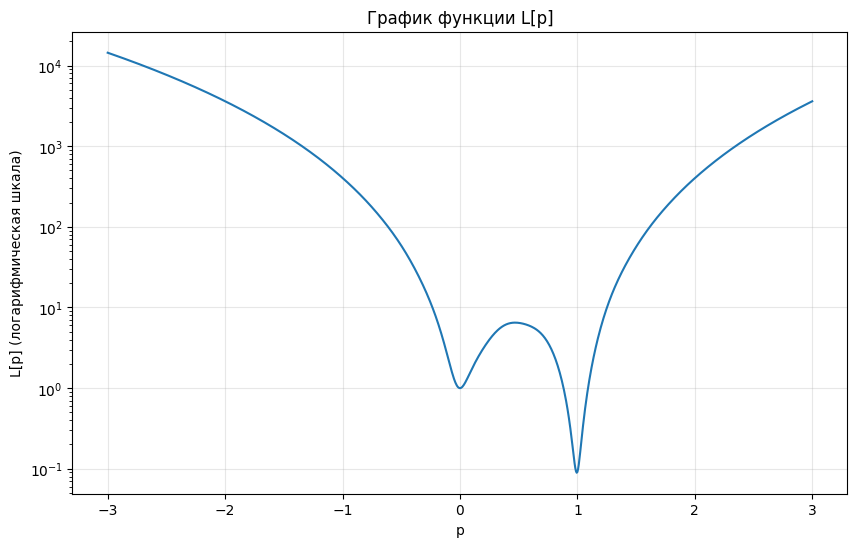

In [49]:
import torch.optim as optim

def L(p: torch.Tensor) -> torch.Tensor:
    return (1 - p)**2 + 100 * (p**2 - p)**2 + 0.1 * torch.sin(20 * p)

p_values = torch.linspace(-3, 3, 1000)
l_values = L(p_values).detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(p_values.numpy(), l_values)
plt.yscale('log')
plt.xlabel('p')
plt.ylabel('L[p] (логарифмическая шкала)')
plt.title('График функции L[p]')
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
import torch.nn.utils as nn_utils

def gradient_descent_comparison(
    p_init,
    learning_rate,
    num_iterations,
    optimizer_params=None,
    early_stopping_threshold=1e-8
):
    if optimizer_params is None:
        optimizer_params = {}

    optimizer_names = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    results = {name: {'p': [], 'L': []} for name in optimizer_names}

    momentum_lr = optimizer_params.get('momentum_lr', learning_rate)
    momentum_momentum = optimizer_params.get('momentum_momentum', 0.9)

    rmsprop_lr = optimizer_params.get('rmsprop_lr', learning_rate)
    rmsprop_alpha = optimizer_params.get('rmsprop_alpha', 0.99)

    adam_lr = optimizer_params.get('adam_lr', learning_rate)

    max_grad_norm = optimizer_params.get('max_grad_norm', None)
    grad_clip_norm_type = optimizer_params.get('grad_clip_norm_type', 2.0)

    p_sgd = torch.tensor([p_init], requires_grad=True)
    opt_sgd = optim.SGD([p_sgd], lr=learning_rate)

    p_mom = torch.tensor([p_init], requires_grad=True)
    opt_mom = optim.SGD([p_mom], lr=momentum_lr, momentum=momentum_momentum)

    p_rmsprop = torch.tensor([p_init], requires_grad=True)
    opt_rmsprop = optim.RMSprop([p_rmsprop], lr=rmsprop_lr, alpha=rmsprop_alpha)

    p_adam = torch.tensor([p_init], requires_grad=True)
    opt_adam = optim.Adam([p_adam], lr=adam_lr)

    params = [p_sgd, p_mom, p_rmsprop, p_adam]
    optimizers = [opt_sgd, opt_mom, opt_rmsprop, opt_adam]

    for iteration in range(num_iterations):
        for param, optimizer, name in zip(params, optimizers, optimizer_names):
            loss = L(param)

            results[name]['p'].append(param.item())
            results[name]['L'].append(loss.item())

            optimizer.zero_grad()
            loss.backward()

            if max_grad_norm is not None:
                nn_utils.clip_grad_norm_(
                    [param],
                    max_norm=max_grad_norm,
                    norm_type=grad_clip_norm_type
                )

            optimizer.step()

    return results


In [51]:
def test_and_visualize(
    p_init=-2.0,
    learning_rate=0.1,
    num_iterations=1000,
    optimizer_params=None
):


    results = gradient_descent_comparison(
        p_init,
        learning_rate,
        num_iterations,
        optimizer_params
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    for name, data in results.items():
        ax1.plot(data['p'], data['L'], label=name, alpha=0.7, linewidth=2)

    ax1.set_xlabel('p', fontsize=12)
    ax1.set_ylabel('L[p] (логарифмическая шкала)', fontsize=12)
    ax1.set_yscale('log')
    ax1.set_title('Траектории градиентного спуска (p vs L)', fontsize=14)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    for name, data in results.items():
        iterations = range(len(data['L']))
        ax2.plot(iterations, data['L'], label=name, alpha=0.7, linewidth=2)

    ax2.set_xlabel('Номер итерации', fontsize=12)
    ax2.set_ylabel('L[p] (логарифмическая шкала)', fontsize=12)
    ax2.set_yscale('log')
    ax2.set_title('Сходимость оптимизаторов (итерация vs L)', fontsize=14)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nФинальные значения для каждого оптимизатора:")
    print("-" * 60)
    for name, data in results.items():
        final_p = data['p'][-1]
        final_L = data['L'][-1]
        print(f"{name:15s}: p = {final_p:10.6f}, L = {final_L:12.8f}")

    return results

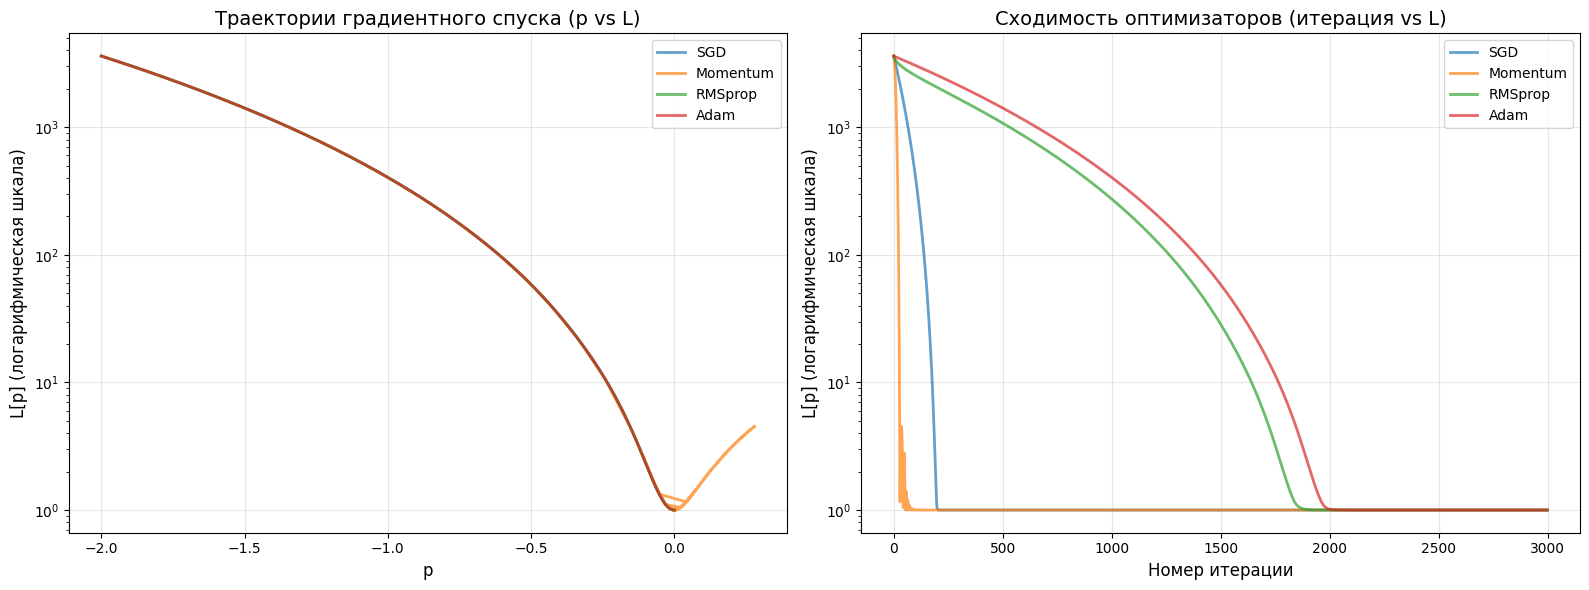


Финальные значения для каждого оптимизатора:
------------------------------------------------------------
SGD            : p =  -0.000000, L =   1.00000000
Momentum       : p =   0.000000, L =   1.00000000
RMSprop        : p =  -0.000000, L =   1.00000000
Adam           : p =  -0.000000, L =   1.00000000


In [52]:
p_initial = -2.0
lr = 0.001
iterations = 3000

optimizers_params = {
    'momentum_lr': lr,                  # Скорость обучения для Momentum (определяет, насколько быстро изменяются веса)
    'momentum_momentum': 0.9,           # Коэффициент инерции Momentum (вес предыдущего шага для сглаживания траектории обучения)
    'rmsprop_lr': lr,                   # Скорость обучения для RMSProp (определяет шаг изменения весов)
    'rmsprop_alpha': 0.99,              # Коэффициент затухания для RMSProp (определяет, насколько учитываются прошлые градиенты)
    'adam_lr': lr,                      # Скорость обучения для Adam (базовый шаг обновления параметров)
    'min_change_threshold': 1e-6,       # Минимальное изменение метрики для останова обучения (критерий ранней остановки)
    'patience': 50,                     # Количество эпох без улучшения до останова (влияет на терпимость алгоритма к плато)
    'max_grad_norm': 10.0,              # Максимальная норма градиента для обрезки (ограничивает взрыв градиентов)
    'grad_clip_norm_type': 2.0          # Тип нормы для градиентной обрезки (обычно L2 — евклидова норма)
}


results = test_and_visualize(
    p_init=p_initial,
    learning_rate=lr,
    num_iterations=iterations,
    optimizer_params = optimizers_params
)

## Задача 5.4 [max = 10 баллов]

В этой задаче мы затронем стабильность дисперсии статистического распределения параметров полносвязной сети, обсуждавшуюся на лекции.

[4 балла] Покажите аналитически, что если для некоторой непрерывной случайной величины $\xi$ верно $\frac{{\rm d}P}{{\rm d}\xi}(-\xi) = \frac{{\rm d}P}{{\rm d}\xi}(+\xi)$ (то есть $\xi$ имеет симметричную относительно нуля плотность распределения), и при этом $\mathbb{E}[\xi^2]=\sigma^2$, то тогда $\mathbb{E}[(\operatorname{ReLU}(\xi))^2]=\frac{1}{2}\sigma^2$.


[6 баллов]
Рассмотрим фрагмент полносвязной сети c функцией активации $\operatorname{ReLU}$:

$$
\begin{aligned}
H^{\rm prev}_{ik} &= \operatorname{ReLU}(Z_{ik}^{\rm prev}),\quad &k\in\{1,\,2,\,\dots,\,d_{\rm prev}\};\\
Z^{\rm next}_{ij} &= b_j + \sum_{k=1}^{d_{\rm prev}} H^{\rm prev}_{ik} w_{kj},\quad &j\in\{1,\,2,\,\dots,\,d_{\rm next}\}.
\end{aligned}
$$

Покажите аналитически, что при инициализации весов $w$ с нулевым матожиданием и дисперсией $\sigma^2$ условием стабильности производных $\partial L/\partial Z^{\rm prev}$ будет выбор $\sigma^2 = 2\;/\;d_{\rm next}$ (см. Главу 7 в учебнике «Understanding Deep Learning»).



## Задача 5.5 [max = 10 баллов]

**Внимание!** Каждый пункт в этой задаче оценивается только при успешном выполнении всех предшествующих ему пунктов

В этой задаче вам предстоит научиться создавать и обучать полносвязные нейронные сети при помощи `torch`, а также применить некоторые методы регуляризации.

[3 балла] Создайте простую полносвязную нейронную сеть для задачи многоклассовой классификации с двумя скрытыми слоями при помощи `torch.nn.Linear`. Функции активации выберите на ваше усмотрение.

Оформите решение в виде класса–наследника `torch.nn.Module` – это позволит задать только методы `__init__` и `forward`, и далее использовать автоматическое дифференцирование.

[4 балла] Обучите вашу сеть классифицировать датасет [MNIST](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) из `torchvision` при помощи оптимизатора `Adam` из `torch.optim`. Подбирая гиперпараметры сети и параметры градиентного спуска, добейтесь точности не менее 60% на валидации. Визуализируйте на одном графике кривые обучения (зависимость функции потерь на тренировочном и валидационном сете от номера эпохи) для нескольких (3-4) ваших экспериментов, включая лучший. Укажите параметры, использованные в каждом из экспериментов.

[3 балла] Выберите на свое усмотрение один явный, один неявный и один эвристический метод регуляризации из рассмотренных на лекции или в учебнике «Understanding Deep Learning». Реализуйте их для вашей сети, зафиксировав лучшие параметры из предыдущего пункта. Визуализируйте на одном графике кривые обучения для каждого из методов регуляризации и без них, сделайте выводы о пользе этих методов с точки зрения качества модели.

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

class MNISTNeuralNetwork(nn.Module):
    def __init__(self, input_dim=28*28, hidden1=256, hidden2=128, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        logits = self.fc3(x)
        return logits

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

root = "./data"
full_train = datasets.MNIST(root=root, train=True, download=True, transform=transform)
test_ds = datasets.MNIST(root=root, train=False, download=True, transform=transform)

train_size = 50000
val_size = len(full_train) - train_size
train_ds, val_ds = random_split(full_train, [train_size, val_size])

batch_size = 128
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [54]:
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f'Epoch {epoch+1}/{epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return train_losses, val_losses, train_accs, val_accs

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Используется устройство: {device}')

epochs = 20
criterion = nn.CrossEntropyLoss()

experiments = [
    {'name': 'Эксп 1: lr=0.001, h1=256, h2=128', 'lr': 0.001, 'h1': 256, 'h2': 128},
    {'name': 'Эксп 2: lr=0.003, h1=512, h2=256', 'lr': 0.003, 'h1': 512, 'h2': 256},
    {'name': 'Эксп 3: lr=0.0005, h1=128, h2=64', 'lr': 0.0005, 'h1': 128, 'h2': 64},
    {'name': 'Эксп 4: lr=0.002, h1=256, h2=128', 'lr': 0.002, 'h1': 256, 'h2': 128},
]

results = []

for exp in experiments:
    print(f"{exp['name']} \n")

    model = MNISTNeuralNetwork(hidden1=exp['h1'], hidden2=exp['h2']).to(device)
    optimizer = optim.Adam(model.parameters(), lr=exp['lr'])

    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader, criterion, optimizer, epochs, device
    )

    results.append({
        'name': exp['name'],
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_acc': val_accs[-1]
    })

    print(f"Финальная точность на валидации: {val_accs[-1]:.2f}%")

Используется устройство: cpu
Эксп 1: lr=0.001, h1=256, h2=128 

Epoch 1/20: Train Loss: 0.2889, Train Acc: 91.45% | Val Loss: 0.1444, Val Acc: 95.72%
Epoch 2/20: Train Loss: 0.1092, Train Acc: 96.61% | Val Loss: 0.1252, Val Acc: 96.09%
Epoch 3/20: Train Loss: 0.0749, Train Acc: 97.62% | Val Loss: 0.0943, Val Acc: 97.19%
Epoch 4/20: Train Loss: 0.0548, Train Acc: 98.22% | Val Loss: 0.0891, Val Acc: 97.20%
Epoch 5/20: Train Loss: 0.0417, Train Acc: 98.72% | Val Loss: 0.0828, Val Acc: 97.46%
Epoch 6/20: Train Loss: 0.0337, Train Acc: 98.91% | Val Loss: 0.0886, Val Acc: 97.45%
Epoch 7/20: Train Loss: 0.0290, Train Acc: 99.07% | Val Loss: 0.1032, Val Acc: 97.17%
Epoch 8/20: Train Loss: 0.0228, Train Acc: 99.22% | Val Loss: 0.0878, Val Acc: 97.50%
Epoch 9/20: Train Loss: 0.0212, Train Acc: 99.28% | Val Loss: 0.1015, Val Acc: 97.30%
Epoch 10/20: Train Loss: 0.0167, Train Acc: 99.44% | Val Loss: 0.1031, Val Acc: 97.46%
Epoch 11/20: Train Loss: 0.0139, Train Acc: 99.54% | Val Loss: 0.1086, Val 

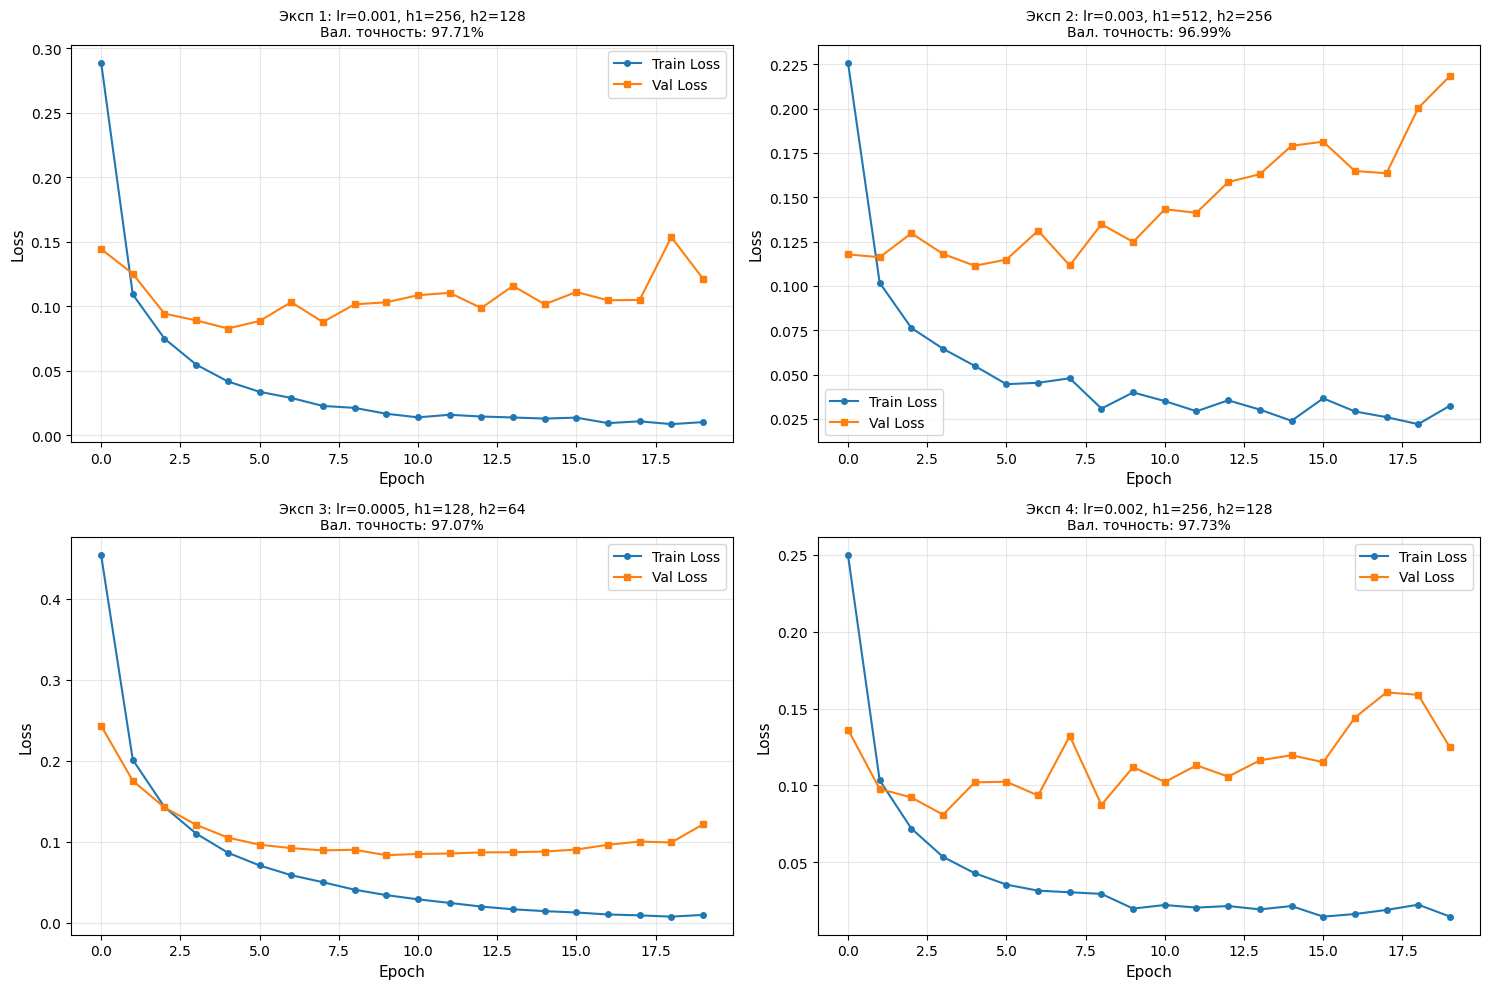

ЛУЧШИЙ РЕЗУЛЬТАТ:
Эксп 4: lr=0.002, h1=256, h2=128 - 97.73%


In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, result in enumerate(results):
    axes[idx].plot(result['train_losses'], label='Train Loss', marker='o', markersize=4)
    axes[idx].plot(result['val_losses'], label='Val Loss', marker='s', markersize=4)
    axes[idx].set_xlabel('Epoch', fontsize=11)
    axes[idx].set_ylabel('Loss', fontsize=11)
    axes[idx].set_title(f"{result['name']}\nВал. точность: {result['val_acc']:.2f}%", fontsize=10)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('experiments_losses.png', dpi=300, bbox_inches='tight')
plt.show()

print("ЛУЧШИЙ РЕЗУЛЬТАТ:")
best_exp = max(results, key=lambda x: x['val_acc'])
print(f"{best_exp['name']} - {best_exp['val_acc']:.2f}%")

In [57]:
class MNISTNeuralNetwork(nn.Module):
    def __init__(self, input_dim=28*28, hidden1=256, hidden2=128, num_classes=10, dropout_p=0.5):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.dropout1 = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.dropout2 = nn.Dropout(p=dropout_p)
        self.fc3 = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        logits = self.fc3(x)
        return logits

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.0, verbose=False):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0

    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

root = "./data"
full_train = datasets.MNIST(root=root, train=True, download=True, transform=transform)
test_ds = datasets.MNIST(root=root, train=False, download=True, transform=transform)

train_size = 50000
val_size = len(full_train) - train_size
train_ds, val_ds = random_split(full_train, [train_size, val_size])

batch_size = 128
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [58]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device, patience=7):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    early_stopping = EarlyStopping(patience=patience, min_delta=0.001, verbose=True)

    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f'Epoch {epoch+1}/{epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print(f"Ранняя остановка на эпохе {epoch+1}")
            break
    
    early_stopping.load_best_model(model)
    return train_losses, val_losses, train_accs, val_accs

experiments = [
    {'name': 'Эксп 1: lr=0.001, h1=256, h2=128, drop=0.5', 'lr': 0.001, 'h1': 256, 'h2': 128, 'dropout': 0.5},
    {'name': 'Эксп 2: lr=0.003, h1=512, h2=256, drop=0.3', 'lr': 0.003, 'h1': 512, 'h2': 256, 'dropout': 0.3},
    {'name': 'Эксп 3: lr=0.0005, h1=128, h2=64, drop=0.4', 'lr': 0.0005, 'h1': 128, 'h2': 64, 'dropout': 0.4},
    {'name': 'Эксп 4: lr=0.002, h1=256, h2=128, drop=0.5', 'lr': 0.002, 'h1': 256, 'h2': 128, 'dropout': 0.5},
]

results = []


In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Используется устройство: {device}')

epochs = 30
patience = 7
criterion = nn.CrossEntropyLoss()

for exp in experiments:
    print(f"\n{'='*70}")
    print(f"{exp['name']}")
    print(f"{'='*70}")

    model = MNISTNeuralNetwork(
        hidden1=exp['h1'], 
        hidden2=exp['h2'],
        dropout_p=exp['dropout']
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=exp['lr'])

    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader, criterion, optimizer, 
        epochs, device, patience=patience
    )

    results.append({
        'name': exp['name'],
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_acc': val_accs[-1]
    })

    print(f"Финальная точность на валидации: {val_accs[-1]:.2f}%")


Используется устройство: cpu

Эксп 1: lr=0.001, h1=256, h2=128, drop=0.5
Epoch 1/30: Train Loss: 0.4978, Train Acc: 84.71% | Val Loss: 0.1796, Val Acc: 94.43%
Epoch 2/30: Train Loss: 0.2471, Train Acc: 92.78% | Val Loss: 0.1311, Val Acc: 95.66%
Epoch 3/30: Train Loss: 0.1992, Train Acc: 94.09% | Val Loss: 0.1112, Val Acc: 96.42%
Epoch 4/30: Train Loss: 0.1730, Train Acc: 94.97% | Val Loss: 0.0964, Val Acc: 96.93%
Epoch 5/30: Train Loss: 0.1603, Train Acc: 95.24% | Val Loss: 0.0900, Val Acc: 97.19%
Epoch 6/30: Train Loss: 0.1486, Train Acc: 95.65% | Val Loss: 0.0893, Val Acc: 97.13%
EarlyStopping counter: 1/7
Epoch 7/30: Train Loss: 0.1384, Train Acc: 95.91% | Val Loss: 0.0857, Val Acc: 97.42%
Epoch 8/30: Train Loss: 0.1326, Train Acc: 96.15% | Val Loss: 0.0825, Val Acc: 97.40%
Epoch 9/30: Train Loss: 0.1237, Train Acc: 96.26% | Val Loss: 0.0801, Val Acc: 97.54%
Epoch 10/30: Train Loss: 0.1184, Train Acc: 96.48% | Val Loss: 0.0776, Val Acc: 97.51%
Epoch 11/30: Train Loss: 0.1121, Train 

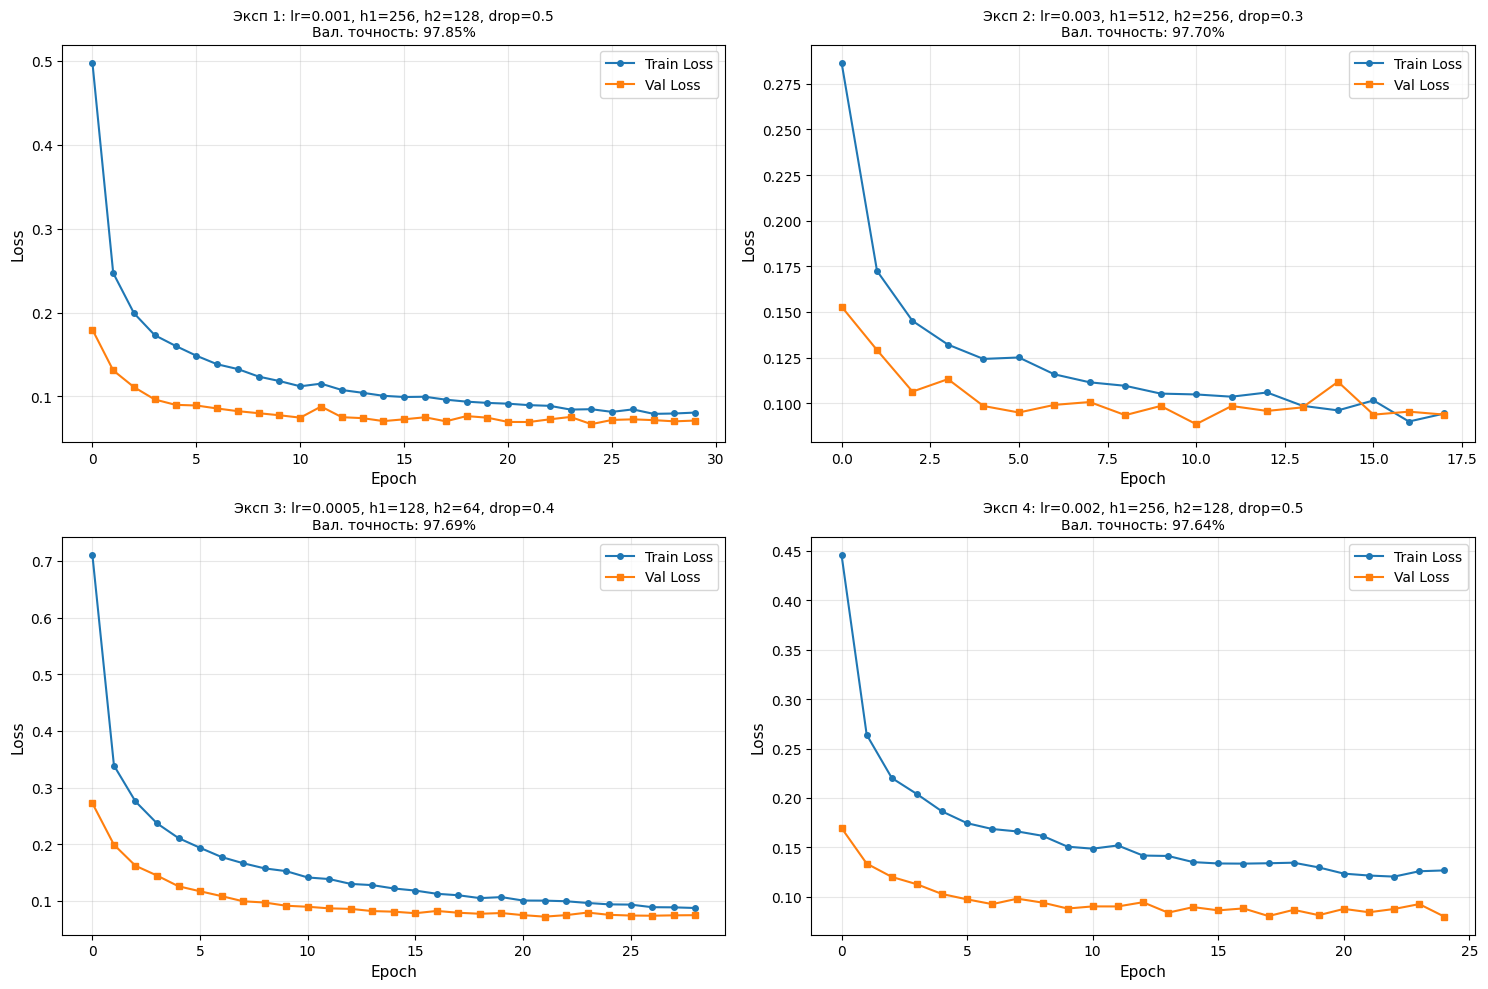

ЛУЧШИЙ РЕЗУЛЬТАТ:
Эксп 1: lr=0.001, h1=256, h2=128, drop=0.5 - 97.85%


In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, result in enumerate(results):
    axes[idx].plot(result['train_losses'], label='Train Loss', marker='o', markersize=4)
    axes[idx].plot(result['val_losses'], label='Val Loss', marker='s', markersize=4)
    axes[idx].set_xlabel('Epoch', fontsize=11)
    axes[idx].set_ylabel('Loss', fontsize=11)
    axes[idx].set_title(f"{result['name']}\nВал. точность: {result['val_acc']:.2f}%", fontsize=10)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('experiments_losses.png', dpi=300, bbox_inches='tight')
plt.show()


print("ЛУЧШИЙ РЕЗУЛЬТАТ:")
best_exp = max(results, key=lambda x: x['val_acc'])
print(f"{best_exp['name']} - {best_exp['val_acc']:.2f}%")
